<a href="https://colab.research.google.com/github/tarapun30ka/ai/blob/main/lab3_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа № 3

## Задание
Решите пожалуйста следующую задачу.

1. Примените методы снижения размерности (до двумерного представления
n_components=2) перечисленные ниже для данных находящихся пo
[ссылке](https://drive.google.com/file/d/1LBDnhITL0Wqwp5G6M6IBI-SSz8BIoNec/view). Здесь - метка (учитель) является столбец / атрибут - `outcome`. Предоставьте результаты, используя следующие ядерные функции:
- PCA
- LDA
- TruncatedSVD
- Kernel PCA (перебрав все ядерные функции - ('linear', 'poly', 'rbf', sigmoid',
'cosine', 'precomputed')

## Загрузка данных

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
! gdown --fuzzy 'https://drive.google.com/file/d/1LBDnhITL0Wqwp5G6M6IBI-SSz8BIoNec/view'

Downloading...
From: https://drive.google.com/uc?id=1LBDnhITL0Wqwp5G6M6IBI-SSz8BIoNec
To: /content/diabetes.csv
100% 23.1k/23.1k [00:00<00:00, 54.3MB/s]


In [ ]:
df = pd.read_csv('/content/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


##  О датасете
[Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/data)

Этот набор данных взят из Национального института диабета, заболеваний органов пищеварения и почек (NIDDK). Целью набора данных является диагностическое предсказание наличия у пациента диабета на основе определенных диагностических измерений, включенных в набор данных. На выбор этих экземпляров из более крупной базы данных было наложено несколько ограничений. В частности, все пациенты здесь — женщины не моложе 21 года, родом из индейцев Пима.

Наборы данных состоят из нескольких переменных медицинских предикторов и одной целевой переменной `Outcome`. Переменные-предикторы включают количество беременностей, которые были у пациентки, её индекс массы тела `BMI`, уровень инсулина, возраст и так далее. Всего в датасете 9 переменных:
- `Pregnancies` - количество беременностей;
- `Glucose` - концентрация глюкозы в плазме через 2 часа при пероральном тесте на толерантность к глюкозе;
- `BloodPressure` - диастолическое артериальное давление (мм рт. ст.);
- `SkinThickness` - толщина кожной складки трицепса (мм);
- `Insulin` - 2-часовой сывороточный инсулин (мкЕд/мл);
- `BMI` - Индекс массы тела (вес в кг/(рост в м)^2);
- `DiabetesPedigreeFunction` - функция оценки вероятности диабета на основе семейного анамнеза;
- `Age` - возраст (лет);
- `Outcome` - целевая переменная (0 или 1) 268 из 768 — 1 (больны), остальные — 0 (здоровы).



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

x = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

## Метод PCA

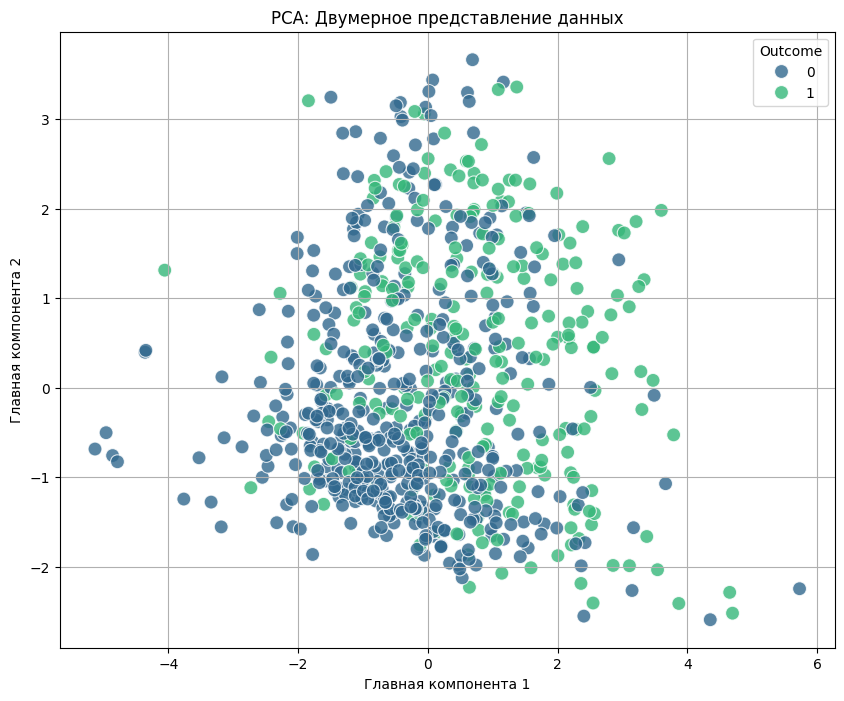

Объясненная дисперсия по каждой компоненте: [0.26179749 0.21640127]
Суммарная объясненная дисперсия: 0.47819876073856576


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

df_pca = pd.DataFrame(data = x_pca, columns = ['Principal Component 1', 'Principal Component 2'])
df_pca['Outcome'] = y

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Principal Component 1',
    y='Principal Component 2',
    hue='Outcome',
    data=df_pca,
    palette='viridis',
    s=100,
    alpha=0.8
)
plt.title('PCA: Двумерное представление данных')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.grid(True)
plt.show()

print("Объясненная дисперсия по каждой компоненте:", pca.explained_variance_ratio_)
print("Суммарная объясненная дисперсия:", sum(pca.explained_variance_ratio_))

## Метод LDA

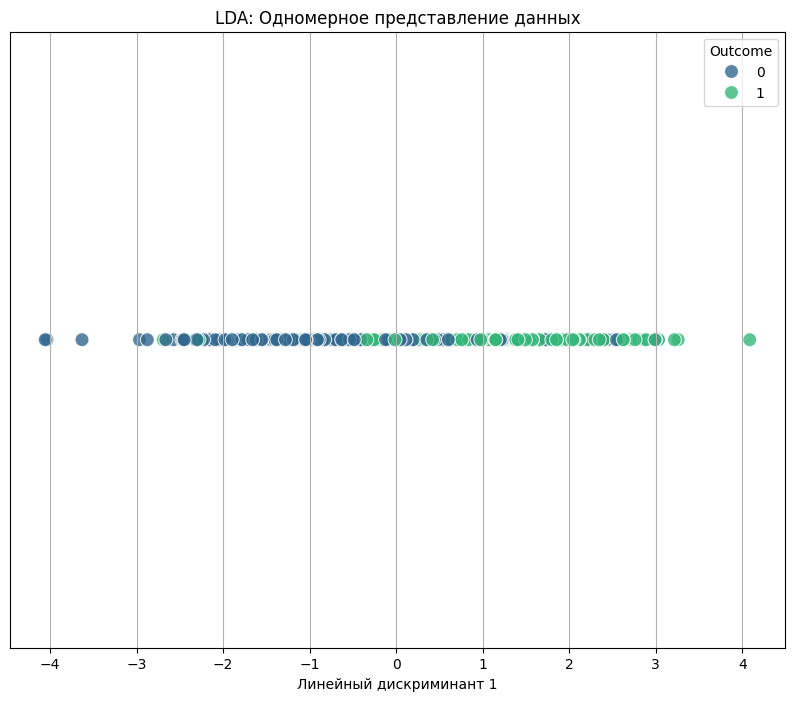

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)
x_lda = lda.fit_transform(x_scaled, y)

df_lda = pd.DataFrame(data = x_lda, columns = ['Linear Discriminant 1'])
df_lda['Outcome'] = y

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Linear Discriminant 1',
    y=[0]*len(df_lda),
    hue='Outcome',
    data=df_lda,
    palette='viridis',
    s=100,
    alpha=0.8
)
plt.title('LDA: Одномерное представление данных')
plt.xlabel('Линейный дискриминант 1')
plt.ylabel('')
plt.yticks([])
plt.grid(True)
plt.show()

## Метод TruncatedSVD

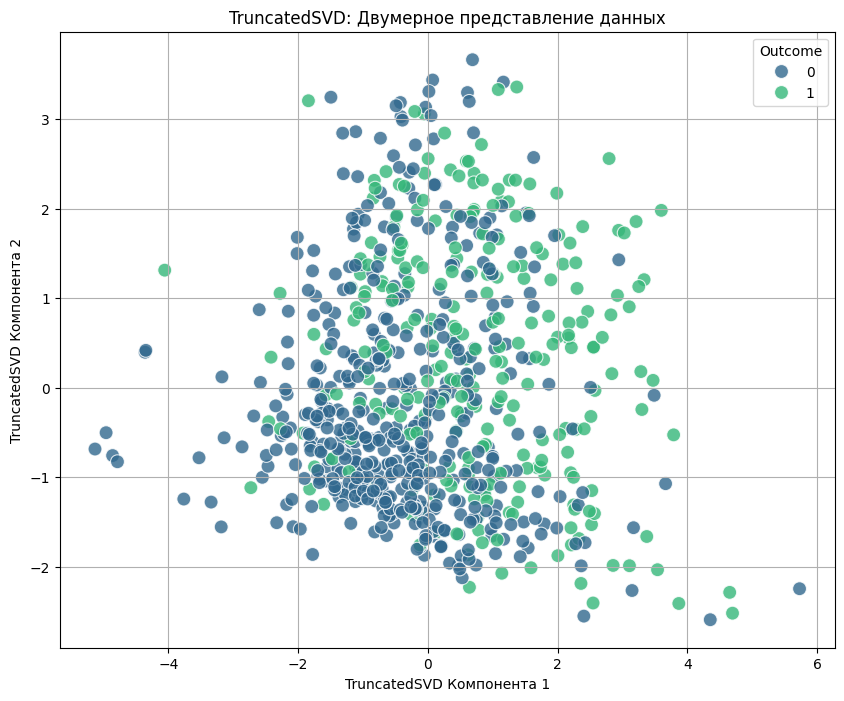

In [ ]:
from sklearn.decomposition import TruncatedSVD

tsvd = TruncatedSVD(n_components=2)
x_tsvd = tsvd.fit_transform(x_scaled)

df_tsvd = pd.DataFrame(data = x_tsvd, columns = ['TruncatedSVD Component 1', 'TruncatedSVD Component 2'])
df_tsvd['Outcome'] = y

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='TruncatedSVD Component 1',
    y='TruncatedSVD Component 2',
    hue='Outcome',
    data=df_tsvd,
    palette='viridis',
    s=100,
    alpha=0.8
)
plt.title('TruncatedSVD: Двумерное представление данных')
plt.xlabel('TruncatedSVD Компонента 1')
plt.ylabel('TruncatedSVD Компонента 2')
plt.grid(True)
plt.show()

## Метод Kernel PCA

###  Ядерная функция `linear`

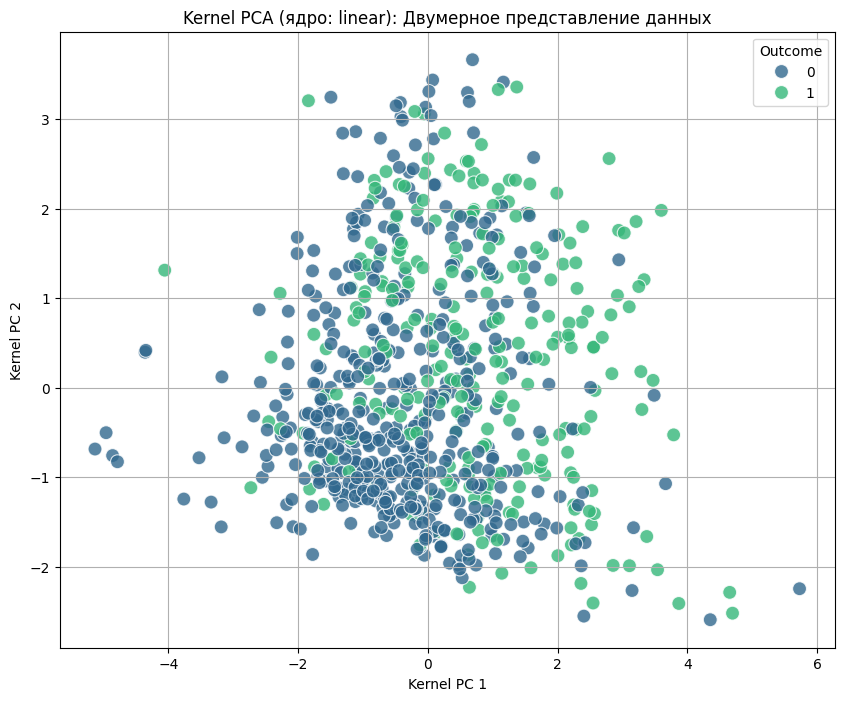

In [ ]:
from sklearn.decomposition import KernelPCA

kpca_linear = KernelPCA(n_components=2, kernel='linear')
x_kpca_linear = kpca_linear.fit_transform(x_scaled)

df_kpca_linear = pd.DataFrame(data = x_kpca_linear, columns = ['Kernel PC 1', 'Kernel PC 2'])
df_kpca_linear['Outcome'] = y

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Kernel PC 1',
    y='Kernel PC 2',
    hue='Outcome',
    data=df_kpca_linear,
    palette='viridis',
    s=100,
    alpha=0.8
)
plt.title('Kernel PCA (ядро: linear): Двумерное представление данных')
plt.xlabel('Kernel PC 1')
plt.ylabel('Kernel PC 2')
plt.grid(True)
plt.show()

###  Ядерная функция `poly`

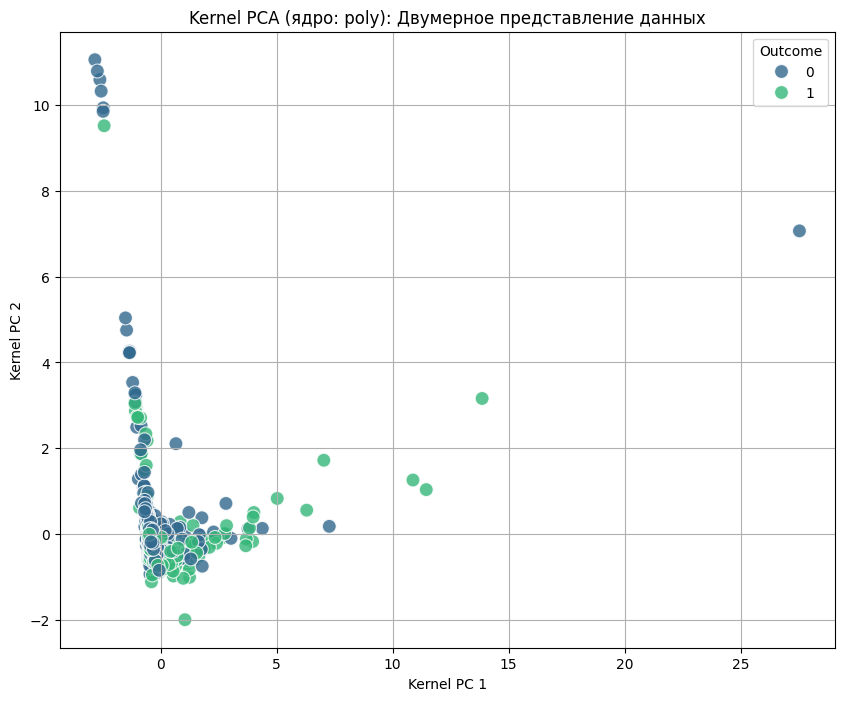

In [ ]:
from sklearn.decomposition import KernelPCA

kpca_poly = KernelPCA(n_components=2, kernel='poly')
x_kpca_poly = kpca_poly.fit_transform(x_scaled)

df_kpca_poly = pd.DataFrame(data = x_kpca_poly, columns = ['Kernel PC 1', 'Kernel PC 2'])
df_kpca_poly['Outcome'] = y

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Kernel PC 1',
    y='Kernel PC 2',
    hue='Outcome',
    data=df_kpca_poly,
    palette='viridis',
    s=100,
    alpha=0.8
)
plt.title('Kernel PCA (ядро: poly): Двумерное представление данных')
plt.xlabel('Kernel PC 1')
plt.ylabel('Kernel PC 2')
plt.grid(True)
plt.show()

###  Ядерная функция `rbf`

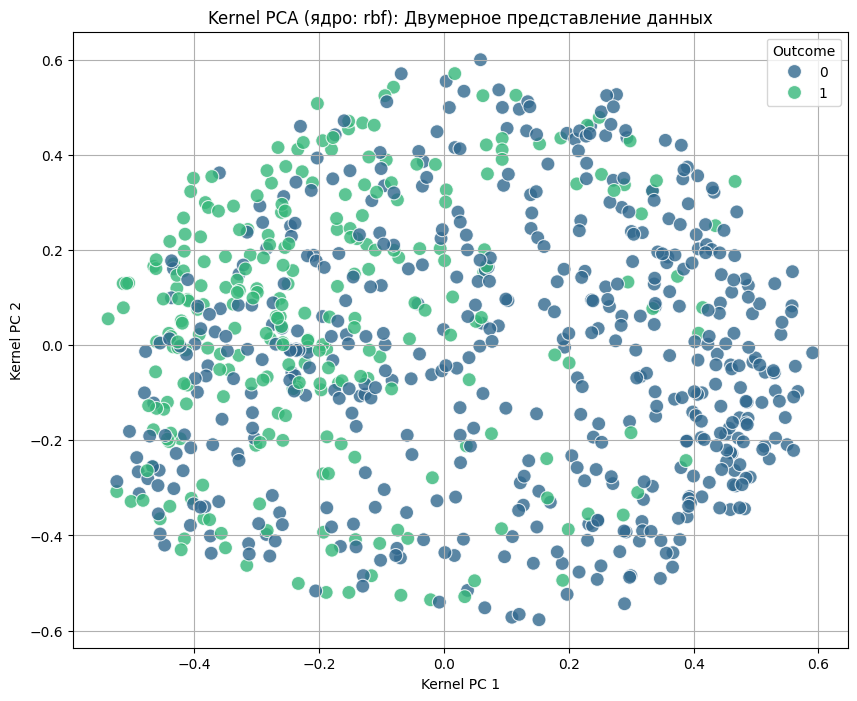

In [ ]:
from sklearn.decomposition import KernelPCA

kpca_rbf = KernelPCA(n_components=2, kernel='rbf')
x_kpca_rbf = kpca_rbf.fit_transform(x_scaled)

df_kpca_rbf = pd.DataFrame(data = x_kpca_rbf, columns = ['Kernel PC 1', 'Kernel PC 2'])
df_kpca_rbf['Outcome'] = y

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Kernel PC 1',
    y='Kernel PC 2',
    hue='Outcome',
    data=df_kpca_rbf,
    palette='viridis',
    s=100,
    alpha=0.8
)
plt.title('Kernel PCA (ядро: rbf): Двумерное представление данных')
plt.xlabel('Kernel PC 1')
plt.ylabel('Kernel PC 2')
plt.grid(True)
plt.show()

###  Ядерная функция `sigmoid`

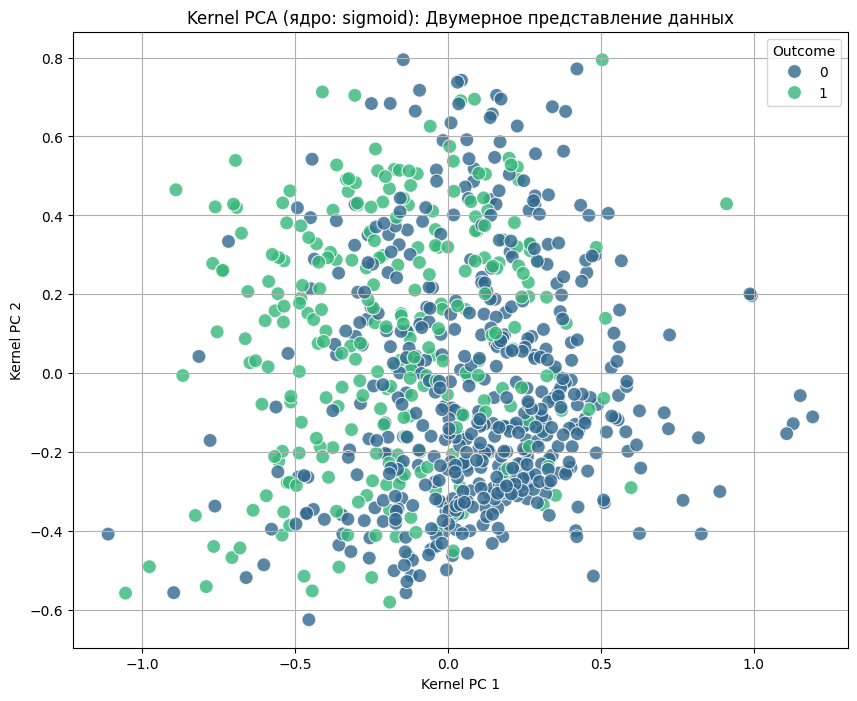

In [ ]:
from sklearn.decomposition import KernelPCA

kpca_sigmoid = KernelPCA(n_components=2, kernel='sigmoid')
x_kpca_sigmoid = kpca_sigmoid.fit_transform(x_scaled)

df_kpca_sigmoid = pd.DataFrame(data = x_kpca_sigmoid, columns = ['Kernel PC 1', 'Kernel PC 2'])
df_kpca_sigmoid['Outcome'] = y

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Kernel PC 1',
    y='Kernel PC 2',
    hue='Outcome',
    data=df_kpca_sigmoid,
    palette='viridis',
    s=100,
    alpha=0.8
)
plt.title('Kernel PCA (ядро: sigmoid): Двумерное представление данных')
plt.xlabel('Kernel PC 1')
plt.ylabel('Kernel PC 2')
plt.grid(True)
plt.show()

###  Ядерная функция `cosine`

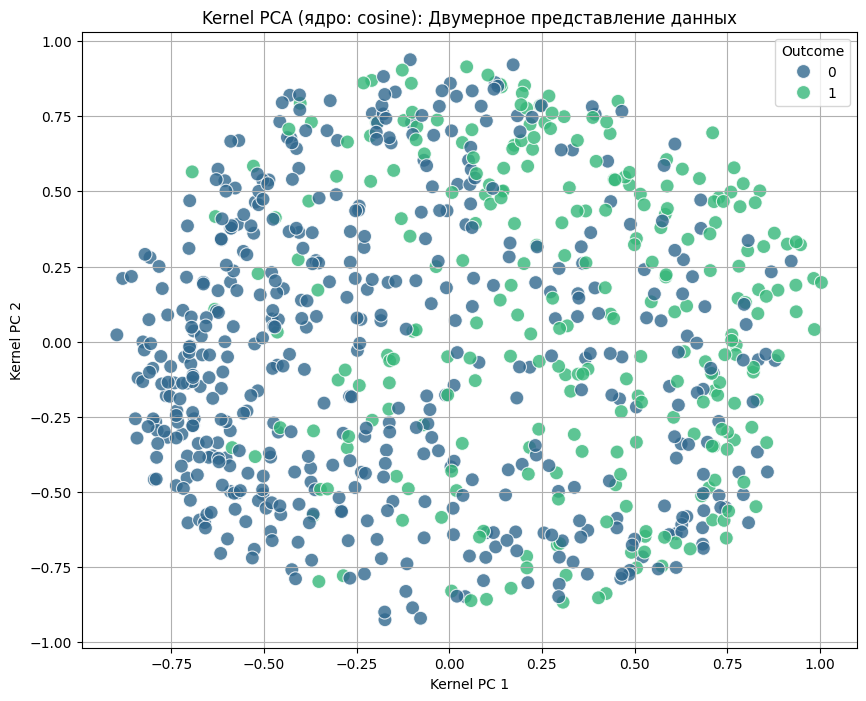

In [ ]:
from sklearn.decomposition import KernelPCA

kpca_cosine = KernelPCA(n_components=2, kernel='cosine')
x_kpca_cosine = kpca_cosine.fit_transform(x_scaled)

df_kpca_cosine = pd.DataFrame(data = x_kpca_cosine, columns = ['Kernel PC 1', 'Kernel PC 2'])
df_kpca_cosine['Outcome'] = y

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Kernel PC 1',
    y='Kernel PC 2',
    hue='Outcome',
    data=df_kpca_cosine,
    palette='viridis',
    s=100,
    alpha=0.8
)
plt.title('Kernel PCA (ядро: cosine): Двумерное представление данных')
plt.xlabel('Kernel PC 1')
plt.ylabel('Kernel PC 2')
plt.grid(True)
plt.show()

###  Ядерная функция `precomputed`

In [ ]:
from sklearn.metrics.pairwise import pairwise_kernels
gram_matrix_linear = pairwise_kernels(x_scaled, metric='linear')

Размерность Gram matrix: (768, 768)


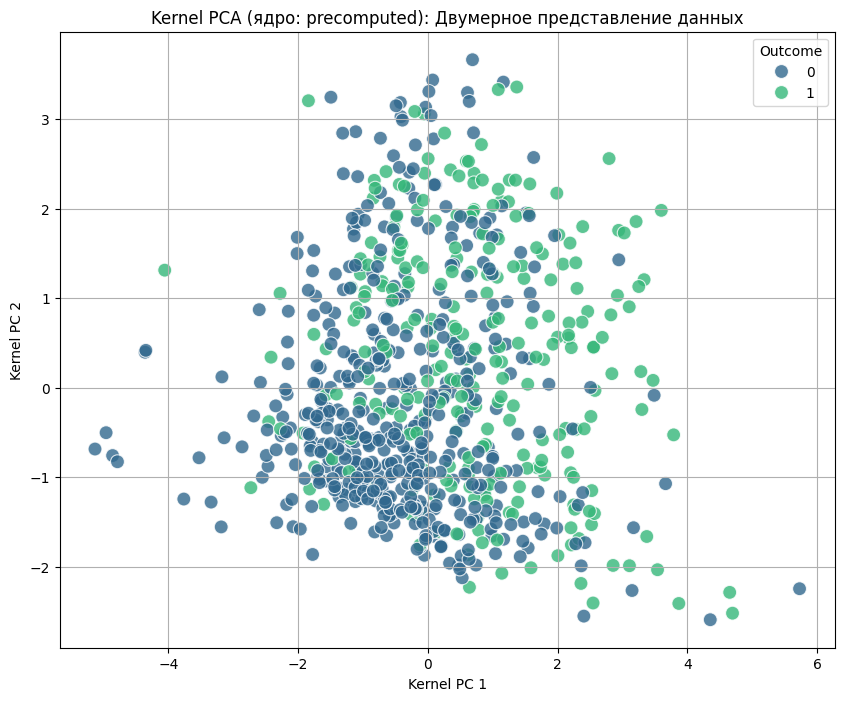

In [ ]:
from sklearn.decomposition import KernelPCA

kpca_precomputed = KernelPCA(n_components=2, kernel='precomputed')
x_kpca_precomputed = kpca_precomputed.fit_transform(gram_matrix_linear)

df_kpca_precomputed = pd.DataFrame(data = x_kpca_precomputed, columns = ['Kernel PC 1', 'Kernel PC 2'])
df_kpca_precomputed['Outcome'] = y

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Kernel PC 1',
    y='Kernel PC 2',
    hue='Outcome',
    data=df_kpca_precomputed,
    palette='viridis',
    s=100,
    alpha=0.8
)
plt.title('Kernel PCA (ядро: precomputed): Двумерное представление данных')
plt.xlabel('Kernel PC 1')
plt.ylabel('Kernel PC 2')
plt.grid(True)
plt.show()